In [1]:
import random
import numpy as np
import torch
import learn2learn as l2l

from torch import nn, optim
import matplotlib.pyplot as plt
import skimage
import skimage.transform
from skimage.color import rgb2gray
from skimage.io import imread_collection

# Loading the Custom Dataset

In [14]:
arr = imread_collection('digits dataset/*.jpg')

arr_n=[]
for img in arr:
    img = skimage.transform.resize(img, (28,28,1))
    arr_n.append(img)
    
arr_n=[x.squeeze().reshape(1,28,28) for x in arr_n]
data=np.concatenate(arr_n)

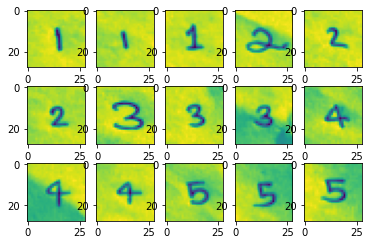

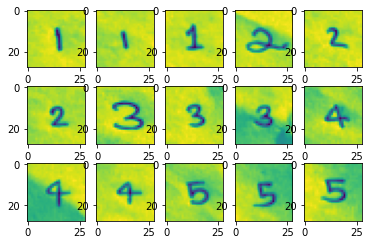

In [7]:
skimage.io.imshow_collection([x.squeeze() for x in arr_n])

# MAML Test

In [38]:
ways=5
shots=1

model1=l2l.vision.models.OmniglotFC(28 ** 2, ways)
model1.load_state_dict(torch.load('meta_omniglot.pth'))
# model.eval()

<All keys matched successfully>

In [39]:
x=torch.FloatTensor(np.concatenate((data[2::3],data[::3]),axis=0))
y=torch.FloatTensor([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],
                     [1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])

from copy import deepcopy
modelc=deepcopy(model1)

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(modelc.parameters(), lr=1e-2)
for t in range(5):
    y_pred = modelc(x)
    
    loss = criterion(y_pred, y)
    print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 11.376582145690918
1 6.310839653015137
2 3.8237736225128174
3 1.8176089525222778
4 0.8511329889297485


# Random Init Test

In [21]:
ways=5
shots=1

model2=l2l.vision.models.OmniglotFC(28 ** 2, ways)

In [36]:
x=torch.FloatTensor(np.concatenate((data[2::3],data[::3]),axis=0))
y=torch.FloatTensor([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],
                    [1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])

from copy import deepcopy
modelrand=deepcopy(model2)

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(modelrand.parameters(), lr=1e-2)
for t in range(5):
    y_pred = modelrand(x)
    
    loss = criterion(y_pred, y)
    print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 9.94571590423584
1 7.830267906188965
2 6.406075477600098
3 3.634197235107422
4 1.3334368467330933


# Testing

In [43]:
x_test = torch.FloatTensor(data)
y_test=torch.FloatTensor([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],
                          [1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],
                          [1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])

### MAML

In [47]:
y_predc=modelc(x_test)

[torch.argmax(l)+1 for l in y_predc]

[tensor(1),
 tensor(1),
 tensor(1),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(3),
 tensor(4),
 tensor(3),
 tensor(4),
 tensor(5),
 tensor(5),
 tensor(5)]

### Rand

In [49]:
y_predrand=modelrand(x_test)

[torch.argmax(l)+1 for l in y_predrand]

[tensor(1),
 tensor(1),
 tensor(1),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(3),
 tensor(4),
 tensor(3),
 tensor(4),
 tensor(5),
 tensor(5),
 tensor(5)]